# Lab06 Pandas 
## Stephen Blackwell
### 2/27/20

# Part A

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.spatial.distance import pdist, squareform
import nltk
import string
# May need this if not already installed
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/StephenBlackwell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/StephenBlackwell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Part B

In [6]:
dmml = pd.read_csv('dmml_survey.csv', sep=',')
dmml.head(6)

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
0,"buzzwordy, but needed. I'm excited to learn de...","CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,7.0,7.0,4.0,4.0,7.0,5.0,7.0,6.0,1.0,1.0,1.0,3.0,5.0
1,I don’t know much about them,"CSC 230 Computer Science II, CSC 301 Database ...",6.0,4.0,4.0,6.0,2.0,4.0,5.0,5.0,6.0,6.0,3.0,3.0,2.0,2.0,6.0
2,These two concepts seem intimately intertwined...,"CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,5.0,6.0,6.0,6.0,5.0,7.0,7.0,7.0,4.0,6.0,2.0,7.0,4.0
3,"To me, data mining is being able to harvest da...","CSC 230 Computer Science II, CSC 242 Organizat...",7.0,7.0,6.0,6.0,3.0,7.0,7.0,2.0,7.0,6.0,7.0,3.0,1.0,2.0,4.0
4,I believe data mining is looking through code ...,"CSC 230 Computer Science II, CSC 242 Organizat...",7.0,6.0,5.0,7.0,4.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0
5,I have positive impressions of them,"CSC 111 Data Science and Visualization, CSC 23...",7.0,7.0,7.0,6.0,5.0,7.0,7.0,6.0,7.0,7.0,6.0,5.0,5.0,7.0,7.0


# Part C

In [7]:
dmml.tail(6)

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dmml = dmml.dropna()
dmml.tail(6)

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
18,I know nothing about machine learning. I think...,"CSC 111 Data Science and Visualization, CSC 23...",7.0,7.0,5.0,7.0,3.0,6.0,7.0,7.0,7.0,6.0,6.0,7.0,7.0,7.0,5.0
19,"Having taken ""data mining"" in the business sch...","CSC 111 Data Science and Visualization, CSC 23...",7.0,7.0,7.0,7.0,7.0,7.0,5.0,2.0,6.0,2.0,7.0,2.0,7.0,5.0,2.0
20,I've had a bit of exposure to machine learning...,"CSC 111 Data Science and Visualization, CSC 23...",7.0,5.0,5.0,5.0,4.0,6.0,5.0,5.0,5.0,2.0,7.0,7.0,7.0,7.0,7.0
21,"Cleaning, transforming, mining data with the a...","CSC 230 Computer Science II, CSC 301 Database ...",7.0,7.0,6.0,6.0,7.0,6.0,6.0,5.0,7.0,5.0,6.0,4.0,7.0,7.0,6.0
22,Sounds cool,"CSC 230 Computer Science II, CSC 242 Organizat...",7.0,7.0,7.0,7.0,5.0,5.0,6.0,6.0,7.0,7.0,7.0,6.0,6.0,5.0,6.0
23,"I think data mining is very powerful, and can ...","CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,6.0,7.0,6.0,6.0,7.0,5.0,7.0,6.0,7.0,7.0,6.0,6.0,5.0


# Part D

In [11]:
impressions = dmml['Impressions']
impressions.head(6)

0    buzzwordy, but needed. I'm excited to learn de...
1                         I don’t know much about them
2    These two concepts seem intimately intertwined...
3    To me, data mining is being able to harvest da...
4    I believe data mining is looking through code ...
5                  I have positive impressions of them
Name: Impressions, dtype: object

# Part E

In [13]:
all_docs = []
stemmer = nltk.stem.porter.PorterStemmer()

for doc in impressions:
    # Make lowercase
    lowered = doc.lower()
    # Remove punctuation
    fixed = lowered.translate(str.maketrans('', '', string.punctuation))
    # Tokenize (splitting on whitespace, plus a few extras)
    tokens = nltk.word_tokenize(fixed)
    
    # Remove stop words
    # Option 2: More legible for loop
    nonstop = []
    for w in tokens:
        if w not in nltk.corpus.stopwords.words('english'):
            nonstop.append(w)
    # Stemming
    # Option 1: Pythonic list comprehension
    #tokens = [stemmer.stem(item) for item in nonstop]
    # Option 2: More legible for loop
    tokens = []
    for w in nonstop:
        tokens.append(stemmer.stem(w))
    # Add the current list of tokens to the list of all the lists of tokens
    all_docs.append(tokens)
num_docs = len(all_docs)
print('Processed', num_docs, 'documents.')
print('First doc looks like this:', all_docs[0])

Processed 24 documents.
First doc looks like this: ['buzzwordi', 'need', 'im', 'excit', 'learn', 'deeper', 'method', 'data', 'mine', 'machin', 'learn', 'usual', 'see', 'machin', 'learn', 'assum', 'peopl', 'appli', 'model', 'im', 'curiou', 'well', 'learn']


# Part F

In [14]:
tc = nltk.TextCollection(all_docs)

In [41]:
fdist = tc.vocab()
# Number of unique words in the text
unique_terms = list(fdist.keys())
num_terms = len(unique_terms)

In [42]:
# Make a 2D array to hold the TF-IDF scores
TD = np.zeros((num_docs, 80))

for i in range(num_docs):
    # Loop through each term
    for j in range(80):
    # Grab the current document from the list of all the documents
        doc = all_docs[i]
        # Grab the current term from the list of all the unique terms
        term = unique_terms[j]
        # Calculate the TF-IDF score for the current term and document
        # and store it in the TD array
        TD[i, j] = tc.tf_idf(term, doc)

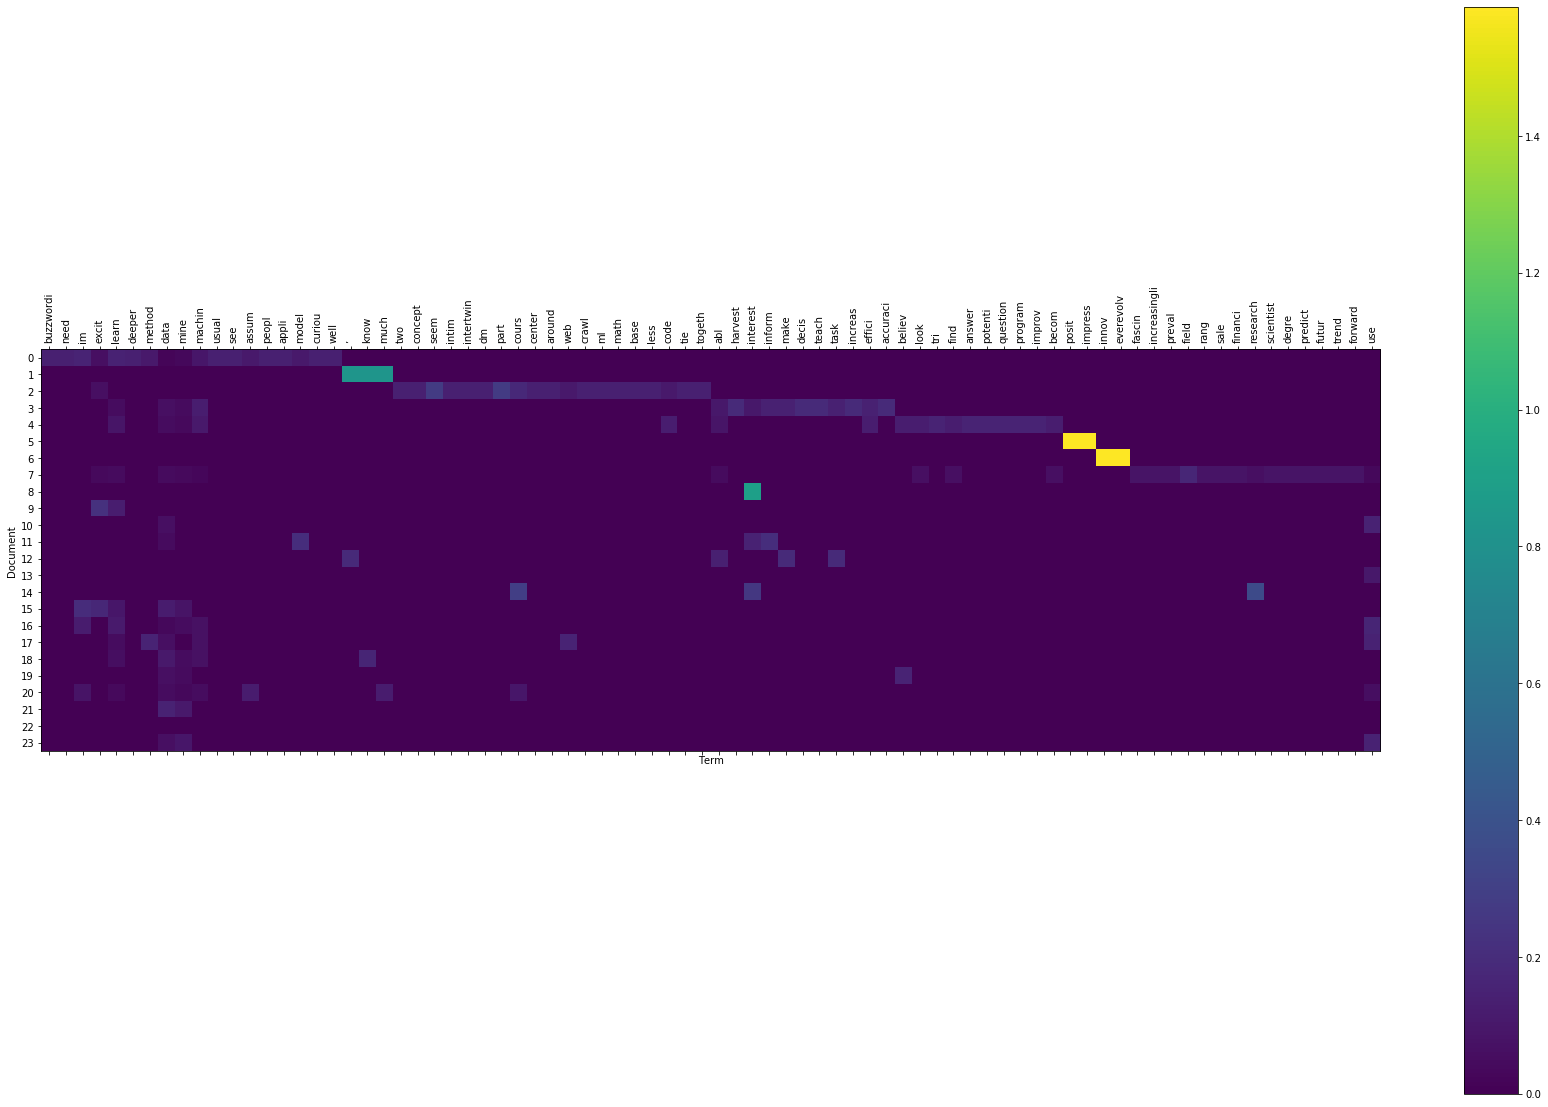

In [45]:
# Visualize the term-document matrix

width = 30
height = 20
fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(111)
cax = ax.matshow(TD)
fig.colorbar(cax)
plt.xticks(np.arange(80), unique_terms[:80], rotation=90)
plt.yticks(np.arange(num_docs), np.arange(num_docs))
plt.xlabel('Term')
plt.ylabel('Document')
plt.show()

In [46]:
# Calc distance matrix

dist = pdist(TD, metric='cosine')
dist = squareform(dist)
# Convert cosine distance to similarity
# (so that bigger numbers mean more similar)
sim = 1 - dist
print(sim.shape)
sim

(24, 24)


array([[1.        , 0.        , 0.01291566, 0.08060203, 0.0967336 ,
        0.        , 0.        , 0.07696942, 0.        , 0.25751371,
        0.01808222, 0.13593429, 0.        , 0.        , 0.        ,
        0.38382303, 0.34930529, 0.22058814, 0.17276514, 0.03532916,
        0.32158286, 0.07483742,        nan, 0.04840972],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.30773208, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.42544299, 0.        ,
        0.28609646, 0.        ,        nan, 0.        ],
       [0.01291566, 0.        , 1.        , 0.        , 0.03683103,
        0.        , 0.        , 0.0108345 , 0.        , 0.08589236,
        0.        , 0.        , 0.        , 0.        , 0.14646627,
        0.05385577, 0.        , 0.08339497, 0.        , 0.        ,
        0.10814522, 0.        ,        nan, 0.        ],
       [0.080

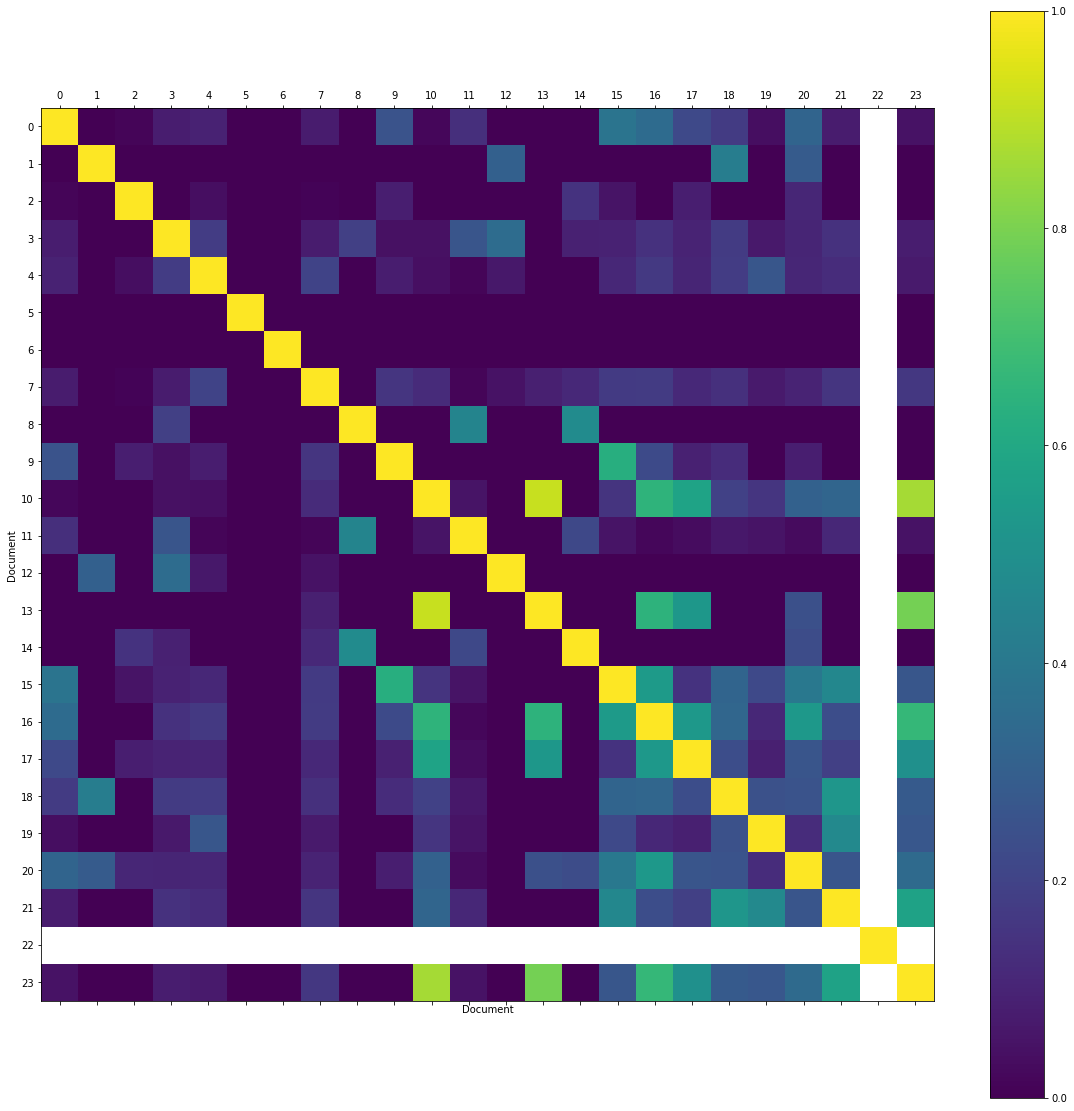

In [48]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
cax = ax.matshow(sim)
fig.colorbar(cax)
plt.xticks(np.arange(num_docs), np.arange(num_docs))
plt.yticks(np.arange(num_docs), np.arange(num_docs))
plt.xlabel('Document')
plt.ylabel('Document')
plt.show()

In [53]:
#HIGH SPOTS 13,10 16,10 23,10
print(sim[13,10])
print(sim[16,10])
print(sim[23,10])


0.9161754532389025
0.6506454060680228
0.8649949956393804


In [54]:
#LOW SPOTS 13,10 16,10 23,10
print(sim[6,1])
print(sim[6,3])
print(sim[6,5])

0.0
0.0
0.0
